# The Tools for Data Science: Notebooks and Versioning - Assignment
##  1. Problem Understanding

To ensure system preparedness throughout the pandemic, hospitals were asked to identify the number of beds (i.e., non-ICU beds) and related resources that could be made available within 24 hours for use as an ICU bed in case of a surge in COVID patients. 

##  2. Dataset description

This dataset compiles daily counts of patients (both COVID-related and non-COVID-related) in adult and pediatric ICU beds and the number of adult and pediatric ICU beds that are unoccupied.

Data includes:

* date
* number of adults in ICU for COVID-related critical illness (CRCI)
* number of adults in ICU for non-CRCI reasons
* number of adult ICU beds that are unoccupied
* total number of adults in ICU for any reason
* number of patients in pediatric ICU for COVID-related critical illness (CRCI)
* number of patients in pediatric ICU beds for non-CRCI reasons
* number of pediatric ICU beds that are unoccupied
* total number of patients in pediatric ICU beds for any reason
##  3. Data exploration


In [2]:
import requests
import pandas as pd

import matplotlib.pyplot as plt

/var/folders/0m/hd5nyhdj19b3dcxl72fwby3c0000gn/T/ipykernel_59587/3797903483.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data exploration for adults patients
1) import the file 

In [3]:
url = "https://data.ontario.ca/dataset/1b5ff63f-48a1-4db6-965f-ab6acbab9f29/resource/c7f2590f-362a-498f-a06c-da127ec41a33/download/icu_beds.csv"
filename = 'icu_beds.csv'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers=headers)

In [4]:
with open(filename, mode="wb") as file:
    file.write(response.content)

In [5]:
df = pd.read_csv(filename)

2) . use .head() command 
It will print the first few rows of the data to visually inspect it

In [6]:
df.head()


,date,adult_icu_crci_patients,adult_icu_non_crci_patients,available_adult_icu_beds,total_adult_icu_patients,total_adult_icu_beds,ped_icu_crci_patients,ped_icu_non_crci_patients,available_ped_icu_beds,total_ped_icu_patients,total_ped_icu_beds
0,2020-05-01,236,1210,566,1446,2012,0,56,33,56,89
1,2020-05-02,246,1211,555,1457,2012,0,54,35,54,89
2,2020-05-03,243,1197,572,1440,2012,0,56,33,56,89
3,2020-05-04,243,1252,517,1495,2012,0,59,30,59,89
4,2020-05-05,240,1247,525,1487,2012,0,56,33,56,89


3). use .info() 
It will print brief information of the dataset about the name, count, type of each columns. 

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   date                         1385 non-null   object
 1   adult_icu_crci_patients      1385 non-null   int64 
 2   adult_icu_non_crci_patients  1385 non-null   int64 
 3   available_adult_icu_beds     1385 non-null   int64 
 4   total_adult_icu_patients     1385 non-null   int64 
 5   total_adult_icu_beds         1385 non-null   int64 
 6   ped_icu_crci_patients        1385 non-null   int64 
 7   ped_icu_non_crci_patients    1385 non-null   int64 
 8   available_ped_icu_beds       1385 non-null   int64 
 9   total_ped_icu_patients       1385 non-null   int64 
 10  total_ped_icu_beds           1385 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 119.1+ KB


4). use .isnull().sum() 
It will check if any missing values.

In [8]:
df.isnull().sum()


date                           0
adult_icu_crci_patients        0
adult_icu_non_crci_patients    0
available_adult_icu_beds       0
total_adult_icu_patients       0
total_adult_icu_beds           0
ped_icu_crci_patients          0
ped_icu_non_crci_patients      0
available_ped_icu_beds         0
total_ped_icu_patients         0
total_ped_icu_beds             0
dtype: int64

5). use .describe() to explore the statictical information

In [9]:
df.describe()

,adult_icu_crci_patients,adult_icu_non_crci_patients,available_adult_icu_beds,total_adult_icu_patients,total_adult_icu_beds,ped_icu_crci_patients,ped_icu_non_crci_patients,available_ped_icu_beds,total_ped_icu_patients,total_ped_icu_beds
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,173.867148,1532.077256,594.126354,1705.944404,2300.070758,2.188448,69.574007,36.135740,71.762455,107.898195
std,164.178736,142.802151,124.281115,108.159326,136.190186,2.265890,18.629811,11.613865,18.857943,17.180541
min,11.000000,543.000000,-449.000000,560.000000,2012.000000,0.000000,29.000000,-55.000000,29.000000,89.000000
25%,76.000000,1460.000000,516.000000,1651.000000,2330.000000,1.000000,54.000000,30.000000,57.000000,93.000000
50%,127.000000,1553.000000,603.000000,1709.000000,2341.000000,2.000000,68.000000,37.000000,69.000000,105.000000
75%,190.000000,1630.000000,662.000000,1762.000000,2343.000000,3.000000,83.000000,43.000000,85.000000,131.000000
max,889.000000,2768.000000,1798.000000,2870.000000,2554.000000,13.000000,185.000000,102.000000,186.000000,154.000000


Abnormality shows in "available_adult_icu_beds" which min is "-449", and "available_ped_icu_beds" which min is "-55".

6). Exploration of Abnormality ("available_adult_icu_beds"):

In [34]:
df[df['available_adult_icu_beds']<0]


,date,adult_icu_crci_patients,adult_icu_non_crci_patients,available_adult_icu_beds,total_adult_icu_patients,total_adult_icu_beds,ped_icu_crci_patients,ped_icu_non_crci_patients,available_ped_icu_beds,total_ped_icu_patients,total_ped_icu_beds,adult_icu_crci_rate
1267,2023-10-20,102,2768,-449,2870,2421,1,185,-55,186,131,0.042131


In [50]:
df[1260:1270]

,date,adult_icu_crci_patients,adult_icu_non_crci_patients,available_adult_icu_beds,total_adult_icu_patients,total_adult_icu_beds,ped_icu_crci_patients,ped_icu_non_crci_patients,available_ped_icu_beds,total_ped_icu_patients,total_ped_icu_beds,adult_icu_crci_rate
1260,2023-10-13,62,1665,694,1727,2421,1,77,53,78,131,0.025609
1261,2023-10-14,61,1660,700,1721,2421,1,77,53,78,131,0.025196
1262,2023-10-15,58,1687,676,1745,2421,1,74,56,75,131,0.023957
1263,2023-10-16,58,1703,660,1761,2421,1,81,49,82,131,0.023957
1264,2023-10-17,57,1704,660,1761,2421,1,87,43,88,131,0.023544
1265,2023-10-18,54,1696,671,1750,2421,1,78,52,79,131,0.022305
1266,2023-10-19,58,1702,661,1760,2421,0,81,50,81,131,0.023957
1267,2023-10-20,102,1870,449,1972,2421,1,75,55,76,131,0.042131
1268,2023-10-21,66,1712,643,1778,2421,0,85,46,85,131,0.027261
1269,2023-10-22,73,1713,635,1786,2421,0,84,47,84,131,0.030153


With the context, we can see the "total_adult_icu_beds" always keeps "2421". Therefore, it is highly possible that "available_adult_icu_beds" of "2023-10-20" is a manual type error with "-449". In this way, the other three adult-related-icu figures should also be changed corresponsably. Hence, we update "available_adult_icu_beds" to "449", and "adult_icu_crci_patients" keeps "102", then "adult_icu_non_crci_patients", "total_adult_icu_patients" can be updated to "1870" and "1972".

In [36]:
df.loc[1267,['adult_icu_non_crci_patients', 'available_adult_icu_beds', 'total_adult_icu_patients',]] = [1870, 449, 1972]

7). Exploration of Abnormality ("available_ped_icu_beds"):

In [37]:
df[df['available_ped_icu_beds']<0]

,date,adult_icu_crci_patients,adult_icu_non_crci_patients,available_adult_icu_beds,total_adult_icu_patients,total_adult_icu_beds,ped_icu_crci_patients,ped_icu_non_crci_patients,available_ped_icu_beds,total_ped_icu_patients,total_ped_icu_beds,adult_icu_crci_rate
922,2022-11-09,138,1642,561,1780,2341,5,117,-10,122,112,0.058949
923,2022-11-10,137,1594,610,1731,2341,4,113,-5,117,112,0.058522
924,2022-11-11,136,1571,634,1707,2341,3,112,-3,115,112,0.058095
925,2022-11-12,143,1521,677,1664,2341,3,110,-1,113,112,0.061085
929,2022-11-16,117,1664,560,1781,2341,2,112,-2,114,112,0.049979
930,2022-11-17,125,1631,585,1756,2341,1,112,-1,113,112,0.053396
931,2022-11-18,129,1600,612,1729,2341,1,114,-3,115,112,0.055105
932,2022-11-19,127,1594,620,1721,2341,1,117,-6,118,112,0.054250
933,2022-11-20,130,1607,604,1737,2341,0,116,-4,116,112,0.055532
1267,2023-10-20,102,1870,449,1972,2421,1,185,-55,186,131,0.042131


As observed in the figure above, from `2022-11-09` to `2022-11-20`, the `available_ped_icu_beds` recorded negative values for a total of 9 days, ranging from "-1" to "-10". This suggests a potential shortage of pediatric ICU beds during that period, leading us to retain the negative values in the `available_ped_icu_beds` column.

However, an anomaly was identified on 2023-10-20 when the `available_ped_icu_beds` showed a value of "-55", exceeding the usual negative range of "-1" to "-10". Recognizing this as a type error, we corrected it to "55" and updated the relevant columns accordingly.

In [47]:
df.loc[1267,['available_ped_icu_beds', 'total_ped_icu_patients', 'ped_icu_non_crci_patients'] ]= [55, 76, 75]

4). use pd.to_datetime() 
It will transfer the format of datetime data date (object) to date (datetime).

In [48]:
df['date'] = pd.to_datetime(df['date'])

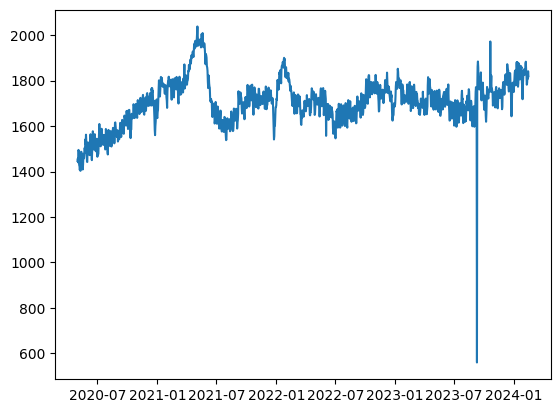

In [49]:
plt.plot(df['date'], df['total_adult_icu_patients'], label='Adult ICU Utilization')


As evident from the figure, an anomaly is apparent in the minimum value of total_adult_icu_patients. Although it is above 0, further investigation into the details of this abnormality is warranted.

In [55]:
df[df['total_adult_icu_patients']== df['total_adult_icu_patients'].min()]

,date,adult_icu_crci_patients,adult_icu_non_crci_patients,available_adult_icu_beds,total_adult_icu_patients,total_adult_icu_beds,ped_icu_crci_patients,ped_icu_non_crci_patients,available_ped_icu_beds,total_ped_icu_patients,total_ped_icu_beds,adult_icu_crci_rate
1226,2023-09-09,17,543,1798,560,2358,0,29,102,29,131,0.007209


In [57]:
df[1225:1230]

,date,adult_icu_crci_patients,adult_icu_non_crci_patients,available_adult_icu_beds,total_adult_icu_patients,total_adult_icu_beds,ped_icu_crci_patients,ped_icu_non_crci_patients,available_ped_icu_beds,total_ped_icu_patients,total_ped_icu_beds,adult_icu_crci_rate
1225,2023-09-08,31,1660,667,1691,2358,0,70,61,70,131,0.013147
1226,2023-09-09,17,543,1798,560,2358,0,29,102,29,131,0.007209
1227,2023-09-10,40,1728,590,1768,2358,0,71,60,71,131,0.016964
1228,2023-09-11,43,1819,496,1862,2358,1,76,54,77,131,0.018236
1229,2023-09-12,41,1843,474,1884,2358,1,76,54,77,131,0.017388


In [59]:
df.loc[1226]['available_adult_icu_beds'] / df.loc[1227]['available_adult_icu_beds']

3.047457627118644

On `2023-09-09`, an anomalous value was observed, exhibiting a sudden threefold increase compared to the contextual data. Despite the absence of any technical errors, it is advisable to review the data with the personnel responsible for inputting it. 

## 4. Detailed questions
**How does the daily utilization rate of adult ICU beds change over time?**

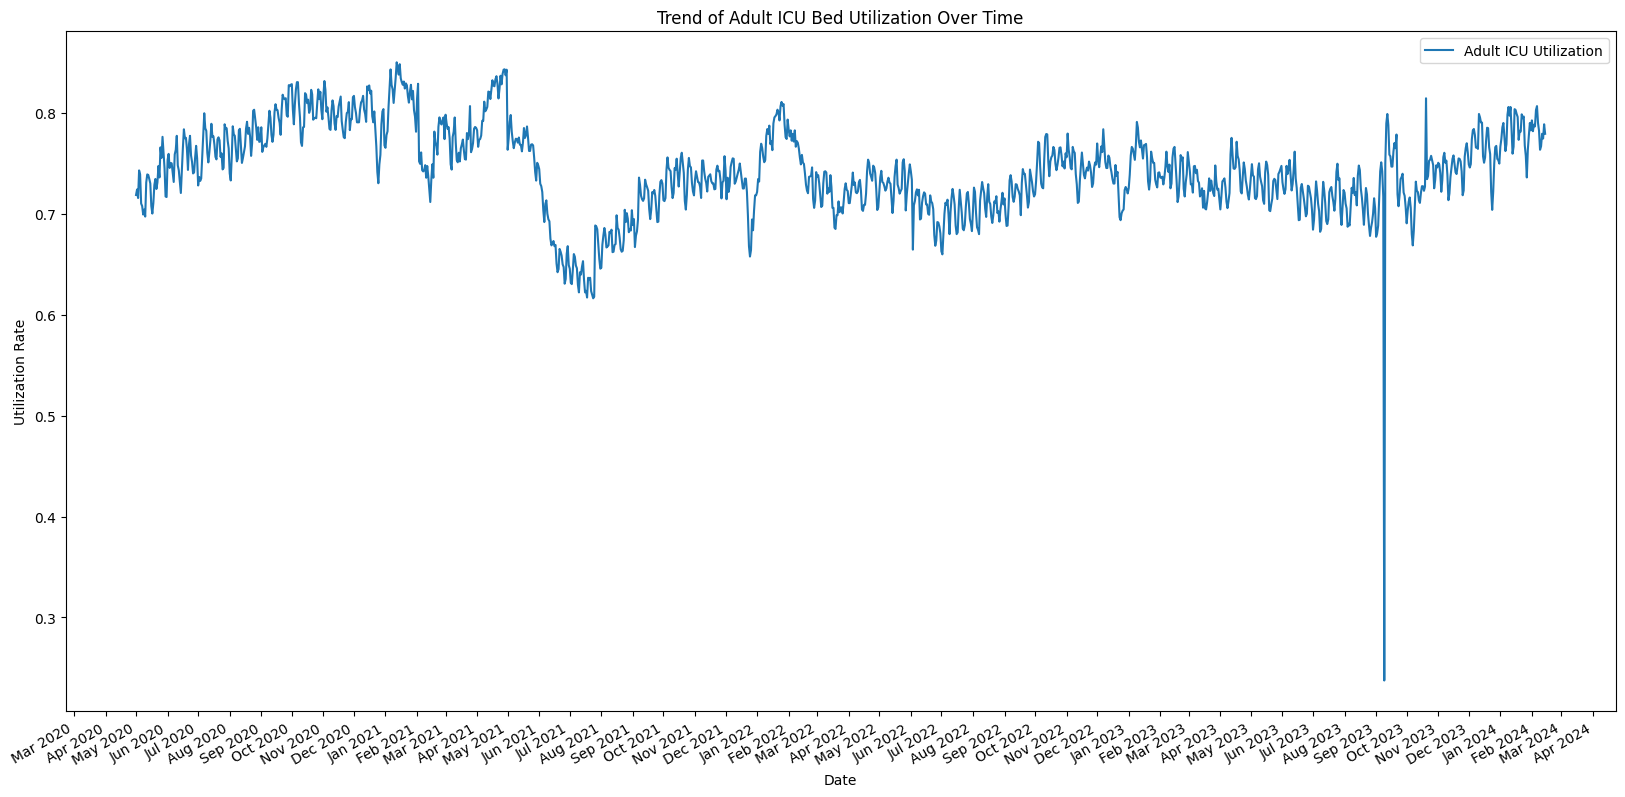

In [68]:
from matplotlib.dates import MonthLocator, DateFormatter

df['adult_icu_beds_rate'] = df['total_adult_icu_patients'] / df['total_adult_icu_beds']
plt.figure(figsize=(20, 10))
plt.plot(df['date'], df['adult_icu_crci_rate'], label='Adult ICU Utilization')
plt.title('Trend of Adult ICU Bed Utilization Over Time')
plt.xlabel('Date')
plt.ylabel('Utilization Rate')


plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()


In [69]:
df['adult_icu_beds_rate'].describe()

count    1385.000000
mean        0.742666
std         0.043419
min         0.237489
25%         0.717885
50%         0.741563
75%         0.769957
max         0.850187
Name: adult_icu_beds_rate, dtype: float64

In [71]:
df[df['adult_icu_beds_rate'] ==df['adult_icu_beds_rate'].max()]

,date,adult_icu_crci_patients,adult_icu_non_crci_patients,available_adult_icu_beds,total_adult_icu_patients,total_adult_icu_beds,ped_icu_crci_patients,ped_icu_non_crci_patients,available_ped_icu_beds,total_ped_icu_patients,total_ped_icu_beds,adult_icu_crci_rate,adult_icu_beds_rate
256,2021-01-12,408,1408,320,1816,2136,1,48,44,49,93,0.850187,0.850187


The average daily utilization rate of adult ICU beds at 74% indicates a notable strain on hospital bed supply from March 2020 to April 2024. The rate experienced a gradual but consistent increase leading up to March 2021, with a significant fluctuation noted in May 2021. Subsequently, a substantial decline occurred until August 2021, followed by a gradual increase leading up to April 2024.

**What is the ratio between COVID-related and non-COVID-related adult ICU beds?**

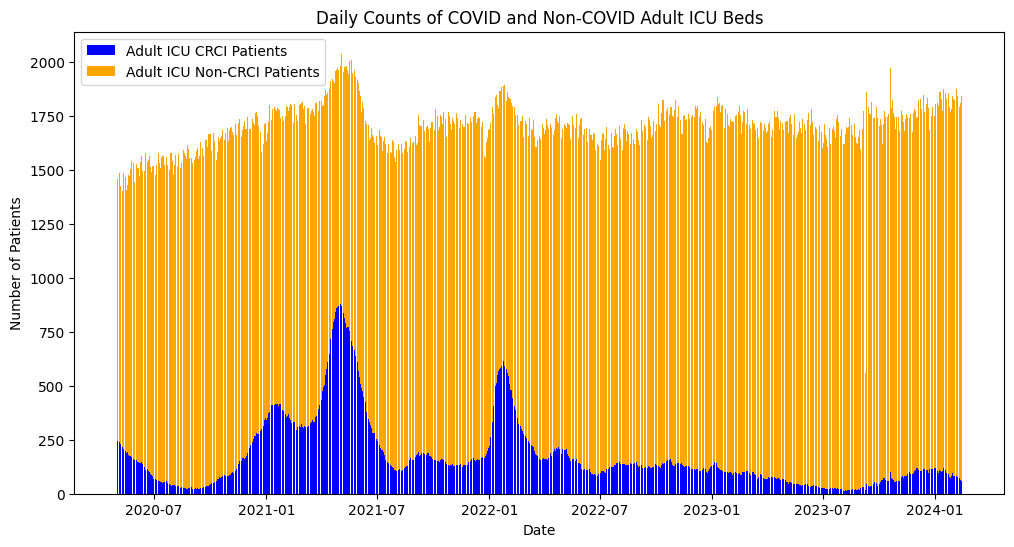

In [61]:
plt.figure(figsize=(12, 6))
plt.bar(df['date'], df['adult_icu_crci_patients'], label='Adult ICU CRCI Patients', color='blue')
plt.bar(df['date'], df['adult_icu_non_crci_patients'], label='Adult ICU Non-CRCI Patients', color='orange', bottom=df['adult_icu_crci_patients'])
plt.title('Daily Counts of COVID and Non-COVID Adult ICU Beds')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()


As depicted in the figure, from July 2020 to January 2024, the number of adult ICU beds allocated for non-COVID patients significantly exceeded those designated for COVID patients. Notably, between February 2021 and January 2024, there is a slight impact indicating a gradual rise in the number of non-COVID patients relative to COVID patients.

**What is the trend of COVID-related cases in pediatric ICU?**

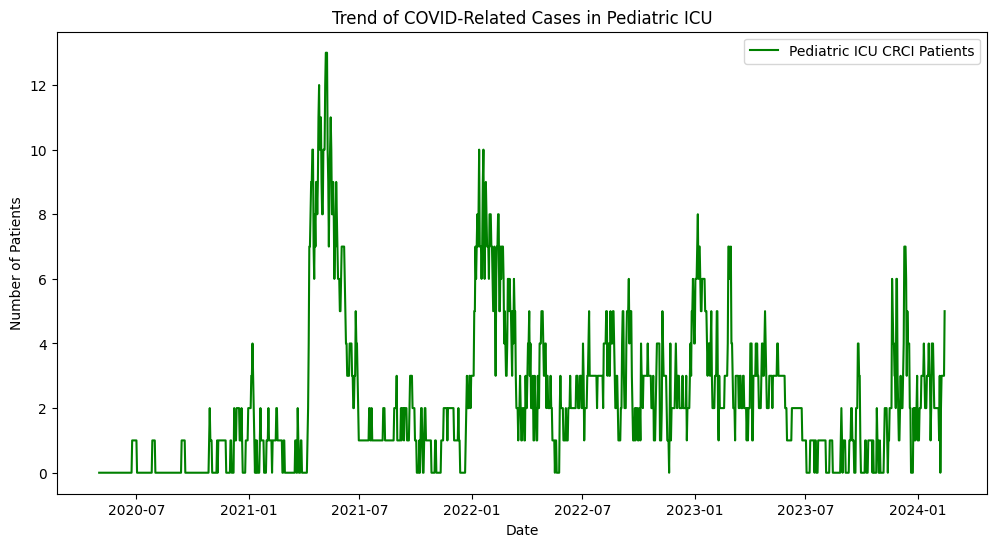

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['ped_icu_crci_patients'], label='Pediatric ICU CRCI Patients', color='green')
plt.title('Trend of COVID-Related Cases in Pediatric ICU')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [72]:
df['ped_icu_crci_patients'].describe()

count    1385.000000
mean        2.188448
std         2.265890
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: ped_icu_crci_patients, dtype: float64

There were two peaks observed, approximately in May 2021 and February 2022, reached to 13 and 10 in the overall number of pediatric patients in the Pediatric ICU. Notably, despite these peaks, the overall number of pediatric patients remained relatively low, hovering around 2 during this period.

**How does the overall utilization rate of adult and pediatric ICU beds change?**

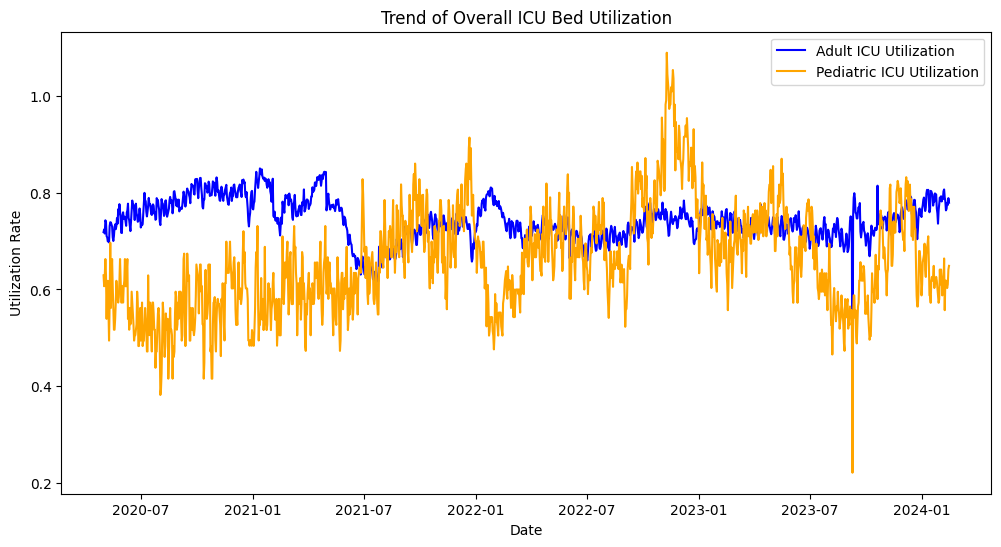

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['total_adult_icu_patients'] / df['total_adult_icu_beds'], label='Adult ICU Utilization', color='blue')
plt.plot(df['date'], df['total_ped_icu_patients'] / df['total_ped_icu_beds'], label='Pediatric ICU Utilization', color='orange')
plt.title('Trend of Overall ICU Bed Utilization')
plt.xlabel('Date')
plt.ylabel('Utilization Rate')
plt.legend()
plt.show()

In contrast to the relatively stable changes observed in adult ICU bed numbers, pediatric ICU beds exhibited significant fluctuations during this period. Before 2021-07, the utilization rate of  pediatric ICU beds remained around 60%, and lower the that of adult ICU beds, which was around 70%. However, it exceeded after 2021-07 until 2022-01, reached to 80% and significantly droped to 50% on 2022-01. It reached an obvious point of shortage around January 2023.

